**Load and Inspect Data**


In [2]:
# Import necessary libraries
import pandas as pd

# Load the dataset
df = pd.read_csv('creditcard.csv')

# Inspect the data
print(df.head())
print(df.info())
print(df.describe())


   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

**Check for Missing Values**

In [3]:
# Check for missing values
print(df.isnull().sum())


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


**Feature Scaling**

In [4]:
# Check mean and standard deviation specifically
print("Mean and standard deviation of 'Amount':")
print("Mean:", df['Amount'].mean())
print("Standard Deviation:", df['Amount'].std())

# Check mean and std for other features for comparison
print("Mean and standard deviation of a sample feature (e.g., 'V1'):")
print("Mean:", df['V1'].mean())
print("Standard Deviation:", df['V1'].std())

Mean and standard deviation of 'Amount':
Mean: 88.34961925093133
Standard Deviation: 250.1201092401885
Mean and standard deviation of a sample feature (e.g., 'V1'):
Mean: 1.1683749838001528e-15
Standard Deviation: 1.9586958038574858


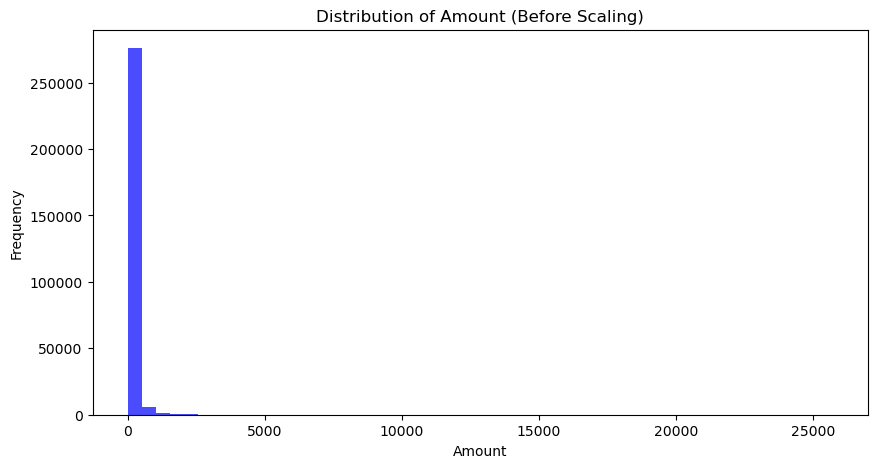

In [4]:
import matplotlib.pyplot as plt

# Plot distribution of 'Amount'
plt.figure(figsize=(10, 5))
plt.hist(df['Amount'], bins=50, color='blue', alpha=0.7)
plt.title('Distribution of Amount (Before Scaling)')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()


In [6]:
from sklearn.preprocessing import StandardScaler

# Scale the 'Amount' feature
scaler = StandardScaler()
df['Amount'] = scaler.fit_transform(df[['Amount']])

# Drop 'Time' feature if it's not useful in your model
df = df.drop(columns=['Time'])


**Step 4: Split the Dataset**

In [7]:
from sklearn.model_selection import train_test_split

# Define X and y
X = df.drop(columns=['Class'])  # Features
y = df['Class']  # Target variable

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


**Step 5: Handle Class Imbalance**

Option 1: Using SMOTE (Synthetic Minority Over-sampling Technique)

In [8]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Assuming you have a dataset with features X and target y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Now X_train_resampled and y_train_resampled have balanced classes


In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
import numpy as np


ModuleNotFoundError: No module named 'distutils'

In [12]:
# Split your data if you haven't already
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [13]:
# Logistic Regression with class_weight='balanced'
log_reg = LogisticRegression(class_weight='balanced', random_state=42)
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)
print("Logistic Regression Results")
print(classification_report(y_test, y_pred_log))
print("ROC-AUC:", roc_auc_score(y_test, log_reg.predict_proba(X_test)[:, 1]))


Logistic Regression Results
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.99     56962

ROC-AUC: 0.9714465520310545


In [14]:
# Decision Tree with class_weight='balanced'
dec_tree = DecisionTreeClassifier(class_weight='balanced', random_state=42)
dec_tree.fit(X_train, y_train)
y_pred_tree = dec_tree.predict(X_test)
print("Decision Tree Results")
print(classification_report(y_test, y_pred_tree))
print("ROC-AUC:", roc_auc_score(y_test, dec_tree.predict_proba(X_test)[:, 1]))


Decision Tree Results
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.71      0.71      0.71        98

    accuracy                           1.00     56962
   macro avg       0.85      0.86      0.86     56962
weighted avg       1.00      1.00      1.00     56962

ROC-AUC: 0.8568878627703193


In [15]:
# K-Nearest Neighbors with n_neighbors=5 (default)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print("K-Nearest Neighbors Results")
print(classification_report(y_test, y_pred_knn))


K-Nearest Neighbors Results
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.90      0.81      0.85        98

    accuracy                           1.00     56962
   macro avg       0.95      0.90      0.92     56962
weighted avg       1.00      1.00      1.00     56962



In [16]:
# Random Forest with class_weight='balanced'
rf = RandomForestClassifier(class_weight='balanced', random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Results")
print(classification_report(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1]))


Random Forest Results
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.96      0.76      0.85        98

    accuracy                           1.00     56962
   macro avg       0.98      0.88      0.92     56962
weighted avg       1.00      1.00      1.00     56962

ROC-AUC: 0.9580130501131234


In [19]:
# XGBoost with scale_pos_weight to balance classes
xgb = XGBClassifier(scale_pos_weight=len(y_train[y_train == 0]) / len(y_train[y_train == 1]), random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
print("XGBoost Results")
print(classification_report(y_test, y_pred_xgb))
print("ROC-AUC:", roc_auc_score(y_test, xgb.predict_proba(X_test)[:, 1]))


c:\Users\rashm\Desktop\Credit Card Fraud Detection - Copy\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [13:59:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Results
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.88      0.85      0.86        98

    accuracy                           1.00     56962
   macro avg       0.94      0.92      0.93     56962
weighted avg       1.00      1.00      1.00     56962

ROC-AUC: 0.9691232500315826


In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
import pandas as pd

# Define a function to calculate and return metrics
def evaluate_model(y_test, y_pred, model_name, model_proba=None):
    metrics = {
        "Model": model_name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred),
    }
    # Add ROC AUC if probability scores are available
    if model_proba is not None:
        metrics["ROC AUC"] = roc_auc_score(y_test, model_proba[:, 1])
    return metrics

# List to store metrics for each model
metrics = []

# Logistic Regression
metrics.append(evaluate_model(y_test, y_pred_log, "Logistic Regression", model_proba=log_reg.predict_proba(X_test)))

# Decision Tree
metrics.append(evaluate_model(y_test, y_pred_tree, "Decision Tree", model_proba=dec_tree.predict_proba(X_test)))

# Random Forest
metrics.append(evaluate_model(y_test, y_pred_rf, "Random Forest", model_proba=rf.predict_proba(X_test)))

# XGBoost
metrics.append(evaluate_model(y_test, y_pred_xgb, "XGBoost", model_proba=xgb.predict_proba(X_test)))

# K-Nearest Neighbors (does not support predict_proba by default if no probabilities are needed for ROC AUC)
metrics.append(evaluate_model(y_test, y_pred_knn, "K-Nearest Neighbors"))

# Convert the list of dictionaries to a DataFrame for easy viewing
metrics_df = pd.DataFrame(metrics)

# Display the results to find the best model
print("Model Performance Summary")
print(metrics_df)

# Optional: Highlight the best values in each column
metrics_df.style.highlight_max(color='lightgreen')



Model Performance Summary
                 Model  Accuracy  Precision    Recall  F1 Score   ROC AUC
0  Logistic Regression  0.974562   0.058785  0.918367  0.110497  0.971447
1        Decision Tree  0.998999   0.707071  0.714286  0.710660  0.856888
2        Random Forest  0.999526   0.961039  0.755102  0.845714  0.958013
3              XGBoost  0.999544   0.882979  0.846939  0.864583  0.969123
4  K-Nearest Neighbors  0.999508   0.897727  0.806122  0.849462       NaN


ImportError: Missing optional dependency 'Jinja2'. DataFrame.style requires jinja2. Use pip or conda to install Jinja2.